## Classification Using KNN Algorithm

In [48]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [30]:
#Importing the data
data = pd.read_csv('iris.csv')
data.head()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [31]:
le = LabelEncoder()
data.Species = le.fit_transform(data.Species)

In [32]:
#Summary of data
data.describe()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.057333,3.758000,1.199333,1.000000
std,43.445368,0.828066,0.435866,1.765298,0.762238,0.819232
min,1.000000,4.300000,2.000000,1.000000,0.100000,0.000000
25%,38.250000,5.100000,2.800000,1.600000,0.300000,0.000000
50%,75.500000,5.800000,3.000000,4.350000,1.300000,1.000000
75%,112.750000,6.400000,3.300000,5.100000,1.800000,2.000000
max,150.000000,7.900000,4.400000,6.900000,2.500000,2.000000


In [33]:
#Target unique values
data.Species.unique()

array([0, 1, 2])

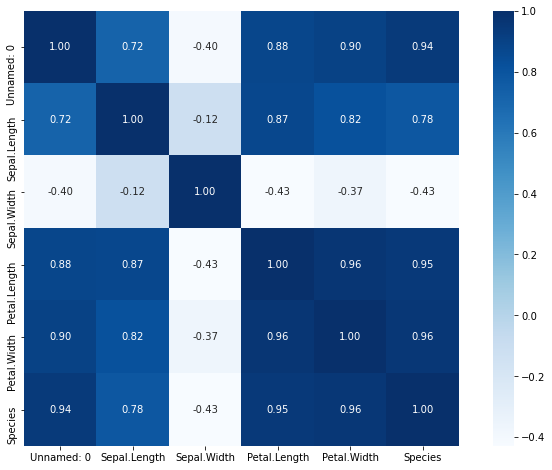

In [34]:
#Correlation
plt.figure(figsize=(12, 8))
ax = sns.heatmap(data.corr(), annot=True, fmt='.2f', square = True, cmap='Blues')

In [35]:
#Droping the non-correlated feature
data.drop('Unnamed: 0', inplace=True, axis = 1)

In [37]:
#Seperating the target feature
X = data.drop('Species', axis = 1)
y = data.Species

In [38]:
#Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 101)

In [39]:
#Accuracy with default paramters
knn = KNeighborsClassifier()

knn.fit(X_train, y_train)

KNeighborsClassifier()

In [40]:
#Accuracy of training and testing
print('Accuracy of training - ', str(knn.score(X_train, y_train)))
print('Accuracy of testing - ', str(knn.score(X_test, y_test)))

Accuracy of training -  0.9666666666666667
Accuracy of testing -  1.0


In [41]:
#Choosing the right k value
error_rate = []
for i in range(1, 30):
    
    knn_2 = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(knn_2, X, y, cv = 10)
    error_rate.append(1-scores.mean())
    

Text(0, 0.5, 'Error Rate')

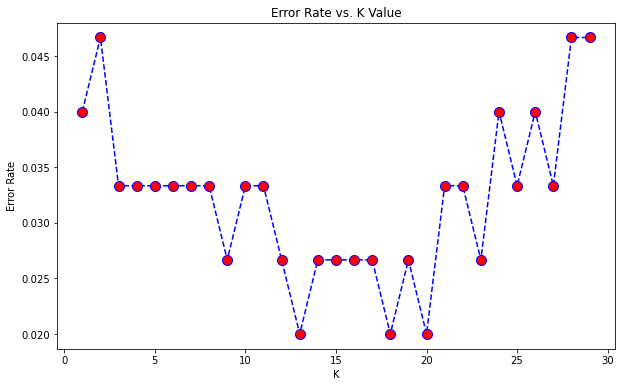

In [42]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30),error_rate,color='blue', linestyle='dashed', marker='o',
        markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')


As we can see the error rates when according to k values choosen

In [45]:
#Building a model with appropriate k value
knn_final = KNeighborsClassifier(n_neighbors=15)
knn_final.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [46]:
#Acuuracy of train and test
print('Accuracy of training - ', str(knn_final.score(X_train, y_train)))
print('Accuracy of testing - ', str(knn_final.score(X_test, y_test)))

Accuracy of training -  0.9416666666666667
Accuracy of testing -  1.0


Text(33.0, 0.5, 'Actual')

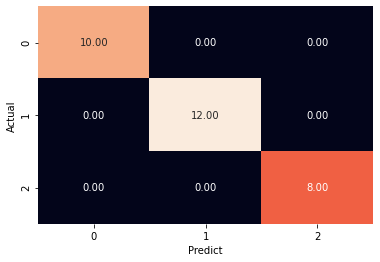

In [50]:
#Confusion matrix
sns.heatmap(confusion_matrix(y_test, knn_final.predict(X_test)), annot = True, cbar = False, fmt = '.2f')
plt.xlabel('Predict')
plt.ylabel('Actual')

In [51]:
#Classification report
print(classification_report(y_test,knn_final.predict(X_test) ))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

